In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
import seaborn as sns
sns.set_context('notebook', font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid")

## 3. Lasso

### (a)

In [124]:
# Set the mean and standard deviation of the distribution
mu, sigma = 0, 1

n = 1000 #rows
p = 5000 #columns

#Generate nxp random matrix X
X = np.random.normal(mu, sigma, size=(n, p))

#standardize
for i in range(X.shape[1]):
    X[:,i] = (X[:,i]-X[:,i].mean())/np.std(X[:,i])

In [125]:
X

array([[ 1.17562745, -0.76775335, -2.09050721, ..., -0.24298892,
         0.95723364,  1.40322415],
       [ 0.20825497, -0.99298231, -0.10856637, ...,  1.96574068,
        -0.96857071,  1.00685813],
       [ 1.51513221,  0.54465858,  1.184364  , ...,  0.56179004,
        -1.80836213, -0.86610104],
       ...,
       [-0.86348567,  0.99909929, -0.86310042, ..., -0.41535234,
         0.10336084,  3.13858455],
       [-1.43516367,  0.5442699 , -1.23017686, ..., -0.71601305,
         1.34027296,  0.65736372],
       [ 1.95143501,  0.16123716,  0.49116977, ...,  1.9986121 ,
         0.91776092,  0.62490661]])

In [126]:
from scipy.sparse import random
from scipy import stats
from numpy.random import default_rng

In [140]:
#Generate randm sparse vector with 0.05p non-zero entries
beta_true = random(p,1, density=0.05)

In [141]:
# to generate gaussian noise

# Set the mean and standard deviation of the distribution
mu, sigma = 0, 1

# Generate the list of 5000 values with a normal distribution
e = np.random.normal(mu, sigma, 1000)


In [142]:
Y = np.dot(X,beta_true.A).flatten() + 0.01*e

In [143]:
Y

array([-2.85067817e+00, -1.08289975e+01,  4.28475041e+00, -1.08068810e+01,
        9.84710578e+00, -8.64271867e+00,  2.79081643e+00,  1.75900344e+00,
        3.54396323e+00, -1.87792931e+01, -1.24593154e+01,  9.22687623e+00,
        1.04605743e+01,  8.01565605e+00,  7.23711571e+00,  1.54496301e+00,
        3.38556838e-01,  5.73890767e-01, -1.31316595e+01, -1.19831691e+01,
       -8.57348649e+00,  5.92066566e+00, -2.64648650e+00,  5.93697884e+00,
        7.27838448e+00, -3.81843553e+00, -1.03422214e+01, -9.42646517e-01,
       -4.54185715e+00,  3.91022557e+00,  5.62066231e+00,  4.45329089e+00,
        1.97325299e+01,  1.13149144e+00, -1.32736831e+01, -1.74829329e+00,
       -1.35911721e+01,  6.15956375e+00,  4.31160650e+00, -3.13295527e+00,
        6.94259085e+00,  9.73023619e+00,  9.56065620e+00,  3.56290527e+00,
       -8.88043286e+00, -8.80786213e+00, -1.10542475e+01, -6.36919939e+00,
        1.62892132e+00, -1.41208155e+01, -1.46369657e+01, -8.89353843e+00,
        1.65871555e+01,  

### (b)

In [273]:
import time
import pywt
from numpy.linalg import norm
import math
import pandas as pd

In [297]:
#penalty factor
lambda1 = 0.1*np.max(abs(np.dot(np.transpose(X),Y)))

In [298]:
# Coordinate descent
maxiter = 1000
beta = np.zeros((p,1))
norm_grad1 = np.zeros((maxiter,1)) #residual

reslist = []
timelist = []
iterlist = []

for k in range(maxiter):
    
    #time start
    t = time.time()
    
    for i in range(p):
        Xi = X[:,i]
        ni = np.dot(np.transpose(Xi),Xi)
        beta[i] = pywt.threshold(beta[i] - np.dot(np.transpose(Xi),(np.dot(X,beta).flatten() - Y))/ni, lambda1/ni , 'soft')
        
    norm_grad1[k] = norm(beta.flatten() - pywt.threshold(beta.flatten() - np.dot(np.transpose(X),(np.dot(X,beta).flatten() - Y)), lambda1, 'soft'))
    
    #elapsed time
    elapsed = time.time() - t
    
    #save results
    reslist.append(norm_grad1[k][0])
    timelist.append(elapsed)
    iterlist.append(k)
    
    if norm_grad1[k] < 10**-3:
        break
        
CD_df = pd.DataFrame({
               'Iteration': iterlist,
               'Residual_CD': reslist,
               'Elapsed_CD': timelist,
                })

In [300]:
# Proximal gradient 
maxiter = 1000
beta = np.zeros((p,1))
norm_grad2 = np.zeros((maxiter,1))
eigval, eigvec = np.linalg.eig(np.dot(np.transpose(X),X))
alpha = 1/max(eigval)  #alpha = 1/L

reslist2 = []
timelist2 = []
iterlist2 = []

for k in range(maxiter):
    
    #time start
    t = time.time()
    
    beta = pywt.threshold(beta.flatten() - alpha*np.dot(np.transpose(X),(np.dot(X,beta).flatten() - Y)), alpha*lambda1 , 'soft')
    norm_grad2[k] = norm(beta.flatten() - pywt.threshold(beta.flatten() - np.dot(np.transpose(X),(np.dot(X,beta).flatten() - Y)), lambda1, 'soft'))
    
    #elapsed time
    elapsed = time.time() - t
    
    #save results
    reslist2.append(norm_grad2[k][0])
    timelist2.append(elapsed)
    iterlist2.append(k)
    
    if norm_grad2[k] < 10**-3:
        break
        
PG_df = pd.DataFrame({
               'Iteration': iterlist2,
               'Residual_PG': reslist2,
               'Elapsed_PG': timelist2,
                })

In [301]:
# Accelerated proximal gradient 
maxiter = 3000

#initialize parameters
t = np.zeros((maxiter +1,1))
t[0] = 1
t[1] = 1
for k in range (2,maxiter+1):
    t[k] = (1 + math.sqrt(1 + 4* t[k -1]**2))/2;

beta = np.zeros((p,1)) 
norm_grad3 = np.zeros((maxiter,1))
beta_old = beta

reslist3 = []
timelist3 = []
iterlist3 = []

for k in range(maxiter):
    
    #time start
    ti = time.time()
    
    beta_bar = beta.flatten() + (t[k] - 1)/(t[k+1])*(beta.flatten()-beta_old.flatten())
    beta_new = pywt.threshold(beta_bar.flatten() - alpha*np.dot(np.transpose(X),(np.dot(X,beta_bar).flatten() - Y)), alpha*lambda1 , 'soft')
    norm_grad3[k] = norm(beta_new.flatten() - pywt.threshold(beta_new.flatten() - np.dot(np.transpose(X),(np.dot(X,beta_new).flatten() - Y)), lambda1, 'soft'))
    beta_old = beta
    beta = beta_new
    
    #elapsed time
    elapsed = time.time() - ti
    
    #save results
    reslist3.append(norm_grad3[k][0])
    timelist3.append(elapsed)
    iterlist3.append(k)
     
    if norm_grad3[k] < 10**-3:
        break
        
APG_df = pd.DataFrame({
               'Iteration': iterlist3,
               'Residual_APG': reslist3,
               'Elapsed_APG': timelist3,
                })

In [302]:
maxiter = 3000
number_list = list(range(0, maxiter))  # Create a list of numbers from 1 to 4777
interval_size = 100  # Set the interval size to 100

# Split the list into subsets of intervals of 100
interval_list = [number_list[i:i+interval_size] for i in range(0, len(number_list), interval_size)]

In [309]:
# Accelerated proximal gradient - restart

beta = np.zeros((p,1)) 
beta_old = beta
norm_grad4 = np.zeros((maxiter,1))

reslist4 = []
timelist4 = []
iterlist4 = []

for ilist in interval_list:
    
    #initialize parameters
    t = np.zeros((len(ilist)+1,1))
    t[0] = 1
    t[1] = 1
    for k in range (2,len(ilist)+1):
        t[k] = (1 + math.sqrt(1 + 4* t[k -1]**2))/2;
    
    for k,true_k in enumerate(ilist):
    
        #time start
        ti = time.time()

        beta_bar = beta.flatten() + (t[k] - 1)/(t[k+1])*(beta.flatten()-beta_old.flatten())
        beta_new = pywt.threshold(beta_bar.flatten() - alpha*np.dot(np.transpose(X),(np.dot(X,beta_bar).flatten() - Y)), alpha*lambda1 , 'soft')
        norm_grad4[true_k] = norm(beta_new.flatten() - pywt.threshold(beta_new.flatten() - np.dot(np.transpose(X),(np.dot(X,beta_new).flatten() - Y)), lambda1, 'soft'))
        beta_old = beta
        beta = beta_new

        #elapsed time
        elapsed = time.time() - ti

        #save results
        reslist4.append(norm_grad4[true_k][0])
        timelist4.append(elapsed)
        iterlist4.append(true_k)

        if norm_grad4[true_k] < 10**-3:
            break
            
    if norm_grad4[true_k] < 10**-3:
        break
        
APGr_df = pd.DataFrame({
               'Iteration': iterlist4,
               'Residual_APG-r': reslist4,
               'Elapsed_APG-r': timelist4,
                })

### (c)

In [312]:
import seaborn as sns
sns.set_context('notebook', font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid")

In [318]:
CD_df['base-10 log residual_CD'] = CD_df['Residual_CD'].apply(lambda x: math.log10(x))
PG_df['base-10 log residual_PG'] = PG_df['Residual_PG'].apply(lambda x: math.log10(x))
APG_df['base-10 log residual_APG'] = APG_df['Residual_APG'].apply(lambda x: math.log10(x))
APGr_df['base-10 log residual_APG-r'] = APGr_df['Residual_APG-r'].apply(lambda x: math.log10(x))

In [346]:
CD_df['total_elapsed_CD'] = CD_df['Elapsed_CD'].cumsum()
PG_df['total_elapsed_PG'] = PG_df['Elapsed_PG'].cumsum()
APG_df['total_elapsed_APG'] = APG_df['Elapsed_APG'].cumsum()
APGr_df['total_elapsed_APG-r'] = APGr_df['Elapsed_APG-r'].cumsum()

In [347]:
result = pd.concat([CD_df, PG_df, APG_df, APGr_df], axis=1)

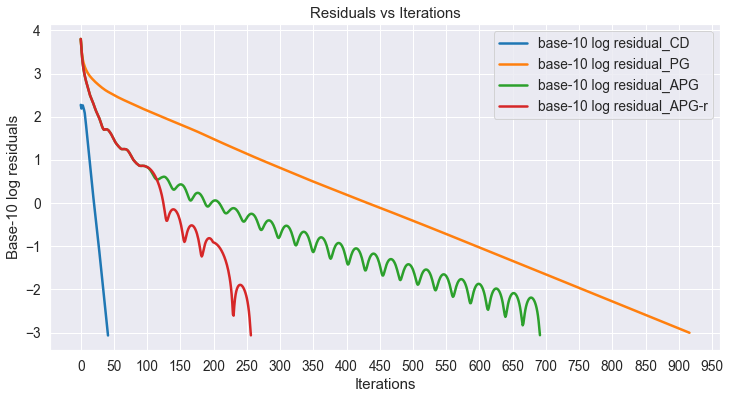

In [354]:
result_error = result[['base-10 log residual_CD','base-10 log residual_PG','base-10 log residual_APG', 'base-10 log residual_APG-r']]

result_error.plot(figsize=(12, 6))
plt.legend(loc='upper right')
plt.title('Residuals vs Iterations')
plt.xlabel("Iterations")
plt.ylabel("Base-10 log residuals")
plt.xticks(np.arange(0, 1000, 50), np.arange(0, 1000, 50), rotation=0, ha='center')
plt.show()

### (d)

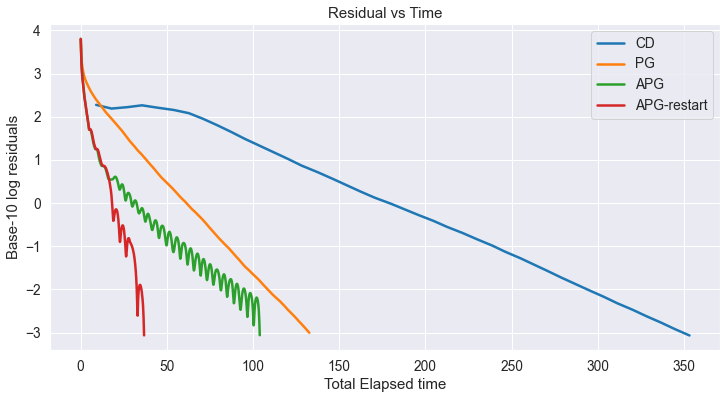

In [352]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.plot(result['total_elapsed_CD'].tolist(), result['base-10 log residual_CD'].tolist(), label ='CD')
plt.plot(result['total_elapsed_PG'].tolist(), result['base-10 log residual_PG'].tolist(), label ='PG')
plt.plot(result['total_elapsed_APG'].tolist(), result['base-10 log residual_APG'].tolist(), label ='APG')
plt.plot(result['total_elapsed_APG-r'].tolist(), result['base-10 log residual_APG-r'].tolist(), label ='APG-restart')

plt.xlabel("Total Elapsed time")
plt.ylabel("Base-10 log residuals")
plt.legend(loc='upper right')
plt.title('Residual vs Time')
plt.show()

In [365]:
import plotly.graph_objects as go

# create the plot
fig = go.Figure()
fig.add_trace(go.Scatter3d(y=result['total_elapsed_CD'].tolist(), 
                                   z=result['base-10 log residual_CD'].tolist(), 
                                   x=result.index.tolist(), 
                                   mode='lines',
                                   name ='CD'))

fig.add_trace(go.Scatter3d(y=result['total_elapsed_PG'].tolist(), 
                                   z=result['base-10 log residual_PG'].tolist(), 
                                   x=result.index.tolist(), 
                                   mode='lines',
                                   name ='PG'))

fig.add_trace(go.Scatter3d(y=result['total_elapsed_APG'].tolist(), 
                                   z=result['base-10 log residual_APG'].tolist(), 
                                   x=result.index.tolist(), 
                                   mode='lines',
                                   name ='APG'))

fig.add_trace(go.Scatter3d(y=result['total_elapsed_APG-r'].tolist(), 
                                   z=result['base-10 log residual_APG-r'].tolist(), 
                                   x=result.index.tolist(), 
                                   mode='lines',
                                   name ='APG-r'))

# set the layout
fig.update_layout(scene=dict(xaxis_title="Iterations",
                             yaxis_title="Total Elapsed time",
                             zaxis_title="Base-10 log residuals"))

# show the plot
fig.show()

### (e)

In [367]:
# Accelerated proximal gradient 
maxiter = 3000

#initialize parameters
t = np.zeros((maxiter +1,1))
t[0] = 1
t[1] = 1
for k in range (2,maxiter+1):
    t[k] = (1 + math.sqrt(1 + 4* t[k -1]**2))/2;

beta = np.zeros((p,1)) 
norm_grad3 = np.zeros((maxiter,1))
beta_old = beta
eigval, eigvec = np.linalg.eig(np.dot(np.transpose(X),X))
alpha = 1/max(eigval)  #alpha = 1/L

reslist3 = []
timelist3 = []
iterlist3 = []

for k in range(maxiter):
    
    #time start
    ti = time.time()
    
    beta_bar = beta.flatten() + (t[k] - 1)/(t[k+1])*(beta.flatten()-beta_old.flatten())
    beta_new = pywt.threshold(beta_bar.flatten() - alpha*np.dot(np.transpose(X),(np.dot(X,beta_bar).flatten() - Y)), alpha*lambda1 , 'soft')
    norm_grad3[k] = norm(beta_new.flatten() - pywt.threshold(beta_new.flatten() - np.dot(np.transpose(X),(np.dot(X,beta_new).flatten() - Y)), lambda1, 'soft'))
    beta_old = beta
    beta = beta_new
    
    #elapsed time
    elapsed = time.time() - ti
    
    #save results
    reslist3.append(norm_grad3[k][0])
    timelist3.append(elapsed)
    iterlist3.append(k)
     
    if norm_grad3[k] < 10**-10:
        break
        
APG_df = pd.DataFrame({
               'Iteration': iterlist3,
               'Residual_APG': reslist3,
               'Elapsed_APG': timelist3,
                })

In [375]:
# Accelerated proximal gradient - restart
maxiter = 3000
number_list = list(range(0, maxiter))  # Create a list of numbers from 1 to 4777
interval_size = 100  # Set the interval size to 100

# Split the list into subsets of intervals of 100
interval_list = [number_list[i:i+interval_size] for i in range(0, len(number_list), interval_size)]

beta = np.zeros((p,1)) 
beta_old = beta
norm_grad4 = np.zeros((maxiter,1))
eigval, eigvec = np.linalg.eig(np.dot(np.transpose(X),X))
alpha = 1/max(eigval)  #alpha = 1/L

reslist4 = []
timelist4 = []
iterlist4 = []

for ilist in interval_list:
    
    #initialize parameters
    t = np.zeros((len(ilist)+1,1))
    t[0] = 1
    t[1] = 1
    for k in range (2,len(ilist)+1):
        t[k] = (1 + math.sqrt(1 + 4* t[k -1]**2))/2;
    
    for k,true_k in enumerate(ilist):
    
        #time start
        ti = time.time()

        beta_bar = beta.flatten() + (t[k] - 1)/(t[k+1])*(beta.flatten()-beta_old.flatten())
        beta_new = pywt.threshold(beta_bar.flatten() - alpha*np.dot(np.transpose(X),(np.dot(X,beta_bar).flatten() - Y)), alpha*lambda1 , 'soft')
        norm_grad4[true_k] = norm(beta_new.flatten() - pywt.threshold(beta_new.flatten() - np.dot(np.transpose(X),(np.dot(X,beta_new).flatten() - Y)), lambda1, 'soft'))
        beta_old = beta
        beta = beta_new

        #elapsed time
        elapsed = time.time() - ti

        #save results
        reslist4.append(norm_grad4[true_k][0])
        timelist4.append(elapsed)
        iterlist4.append(true_k)

        if norm_grad4[true_k] < 10**-10:
            break
            
    if norm_grad4[true_k] < 10**-10:
        break
        
APGr_df = pd.DataFrame({
               'Iteration': iterlist4,
               'Residual_APG-r': reslist4,
               'Elapsed_APG-r': timelist4,
                })

In [382]:
APG_df['total_elapsed_APG'] = APG_df['Elapsed_APG'].cumsum()
APGr_df['total_elapsed_APG-r'] = APGr_df['Elapsed_APG-r'].cumsum()

In [389]:
# compile
data = {'relative residual error': [APG_df.iloc[APG_df.shape[0]-1]['Residual_APG'], APGr_df.iloc[APGr_df.shape[0]-1]['Residual_APG-r']], 
        'iterations': [int(APG_df.iloc[APG_df.shape[0]-1]['Iteration']), int(APGr_df.iloc[APGr_df.shape[0]-1]['Iteration'])],
        'time (sec)' : [round(APG_df.iloc[APG_df.shape[0]-1]['total_elapsed_APG'],2), round(APGr_df.iloc[APGr_df.shape[0]-1]['total_elapsed_APG-r'],2)]}
  
# Creates pandas DataFrame.
df = pd.DataFrame(data, index=['APG',
                               'APG-restart'
                              ])

df

,relative residual error,iterations,time (sec)
APG,8.452293e-11,2582,394.16
APG-restart,9.932182e-11,630,96.21


### (f)

In [408]:
def apg(X, Y, maxiter, stepsize, error_thresh):
    # Accelerated proximal gradient 
    #maxiter = 3000

    #initialize parameters
    t = np.zeros((maxiter +1,1))
    t[0] = 1
    t[1] = 1
    for k in range (2,maxiter+1):
        t[k] = (1 + math.sqrt(1 + 4* t[k -1]**2))/2;

    beta = np.zeros((p,1)) 
    norm_grad3 = np.zeros((maxiter,1))
    beta_old = beta
    eigval, eigvec = np.linalg.eig(np.dot(np.transpose(X),X))
    alpha = stepsize/max(eigval)  #alpha = 1/L

    reslist3 = []
    timelist3 = []
    iterlist3 = []

    for k in range(maxiter):

        #time start
        ti = time.time()

        beta_bar = beta.flatten() + (t[k] - 1)/(t[k+1])*(beta.flatten()-beta_old.flatten())
        beta_new = pywt.threshold(beta_bar.flatten() - alpha*np.dot(np.transpose(X),(np.dot(X,beta_bar).flatten() - Y)), alpha*lambda1 , 'soft')
        norm_grad3[k] = norm(beta_new.flatten() - pywt.threshold(beta_new.flatten() - np.dot(np.transpose(X),(np.dot(X,beta_new).flatten() - Y)), lambda1, 'soft'))
        beta_old = beta
        beta = beta_new

        #elapsed time
        elapsed = time.time() - ti

        #save results
        reslist3.append(norm_grad3[k][0])
        timelist3.append(elapsed)
        iterlist3.append(k)

        if norm_grad3[k] < error_thresh:
            break

    APG_df = pd.DataFrame({
                   'Iteration': iterlist3,
                   'Residual_APG': reslist3,
                   'Elapsed_APG': timelist3,
                    })
    
    APG_df['total_elapsed_APG'] = APG_df['Elapsed_APG'].cumsum()
    APG_df['log10 residual_APG'] = APG_df['Residual_APG'].apply(lambda x: math.log10(x))
    
    return APG_df

In [411]:
def apg_restart(X, Y, maxiter, stepsize, error_thresh, interval_size):
    # Accelerated proximal gradient - restart
    #maxiter = 3000
    number_list = list(range(0, maxiter))  # Create a list of numbers from 1 to 4777
    #interval_size = 100  # Set the interval size to 100

    # Split the list into subsets of intervals of 100
    interval_list = [number_list[i:i+interval_size] for i in range(0, len(number_list), interval_size)]

    beta = np.zeros((p,1)) 
    beta_old = beta
    norm_grad4 = np.zeros((maxiter,1))
    eigval, eigvec = np.linalg.eig(np.dot(np.transpose(X),X))
    alpha = stepsize/max(eigval)  #alpha = 1/L

    reslist4 = []
    timelist4 = []
    iterlist4 = []

    for ilist in interval_list:

        #initialize parameters
        t = np.zeros((len(ilist)+1,1))
        t[0] = 1
        t[1] = 1
        for k in range (2,len(ilist)+1):
            t[k] = (1 + math.sqrt(1 + 4* t[k -1]**2))/2;

        for k,true_k in enumerate(ilist):

            #time start
            ti = time.time()

            beta_bar = beta.flatten() + (t[k] - 1)/(t[k+1])*(beta.flatten()-beta_old.flatten())
            beta_new = pywt.threshold(beta_bar.flatten() - alpha*np.dot(np.transpose(X),(np.dot(X,beta_bar).flatten() - Y)), alpha*lambda1 , 'soft')
            norm_grad4[true_k] = norm(beta_new.flatten() - pywt.threshold(beta_new.flatten() - np.dot(np.transpose(X),(np.dot(X,beta_new).flatten() - Y)), lambda1, 'soft'))
            beta_old = beta
            beta = beta_new

            #elapsed time
            elapsed = time.time() - ti

            #save results
            reslist4.append(norm_grad4[true_k][0])
            timelist4.append(elapsed)
            iterlist4.append(true_k)

            if norm_grad4[true_k] < error_thresh:
                break

        if norm_grad4[true_k] < error_thresh:
            break

    APGr_df = pd.DataFrame({
                   'Iteration': iterlist4,
                   'Residual_APG-r': reslist4,
                   'Elapsed_APG-r': timelist4,
                    })
    
    APGr_df['total_elapsed_APG-r'] = APGr_df['Elapsed_APG-r'].cumsum()
    APGr_df['log10 residual_APG-r'] = APGr_df['Residual_APG-r'].apply(lambda x: math.log10(x))
    
    return APGr_df

In [412]:
APG_df_15 = apg(X, Y, 3000, 1.5, 10**-6)
APG_df_1 = apg(X, Y, 3000, 1, 10**-6)

In [413]:
APGr_df_15 = apg_restart(X, Y, 3000, 1.5, 10**-6, 100)
APGr_df_1 = apg_restart(X, Y, 3000, 1, 10**-6, 100)

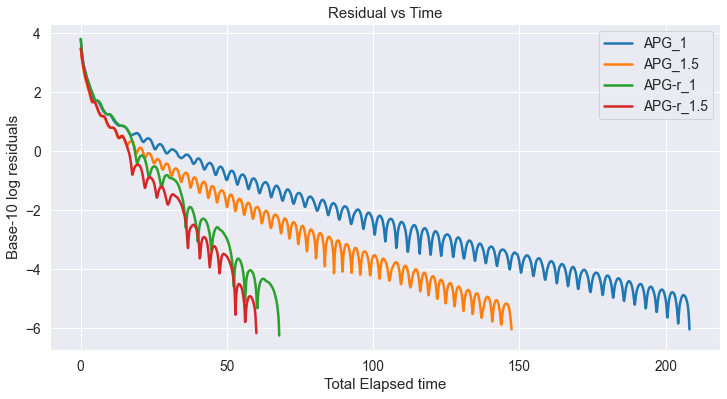

In [416]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.plot(APG_df_1['total_elapsed_APG'].tolist(), APG_df_1['log10 residual_APG'].tolist(), label ='APG_1')
plt.plot(APG_df_15['total_elapsed_APG'].tolist(), APG_df_15['log10 residual_APG'].tolist(), label ='APG_1.5')
plt.plot(APGr_df_1['total_elapsed_APG-r'].tolist(), APGr_df_1['log10 residual_APG-r'].tolist(), label ='APG-r_1')
plt.plot(APGr_df_15['total_elapsed_APG-r'].tolist(), APGr_df_15['log10 residual_APG-r'].tolist(), label ='APG-r_1.5')

plt.xlabel("Total Elapsed time")
plt.ylabel("Base-10 log residuals")
plt.legend(loc='upper right')
plt.title('Residual vs Time')
plt.show()

In [430]:
#time difference between 1 and 1.5 for APG
time_improvement_APG = "{:.2%}".format((APG_df_1.iloc[APG_df_1.shape[0]-1]['total_elapsed_APG'] - APG_df_15.iloc[APG_df_15.shape[0]-1]['total_elapsed_APG'])/APG_df_1.iloc[APG_df_1.shape[0]-1]['total_elapsed_APG'])
print('time improve by {} from {}s using 1/lambda to {}s using 1.5/lambda'.format(time_improvement_APG, 
                                                                                  int(APG_df_1.iloc[APG_df_1.shape[0]-1]['total_elapsed_APG']),
                                                                                  int(APG_df_15.iloc[APG_df_15.shape[0]-1]['total_elapsed_APG'])))

time improve by 29.21% from 208s using 1/lambda to 147s using 1.5/lambda


In [432]:
#time difference between 1 and 1.5 for APG-restart
time_improvement_APGr = "{:.2%}".format((APGr_df_1.iloc[APGr_df_1.shape[0]-1]['total_elapsed_APG-r'] - APGr_df_15.iloc[APGr_df_15.shape[0]-1]['total_elapsed_APG-r'])/APGr_df_1.iloc[APGr_df_1.shape[0]-1]['total_elapsed_APG-r'])
print('time improve by {} from {}s using 1/lambda to {}s using 1.5/lambda'.format(time_improvement_APGr, 
                                                                                  int(APGr_df_1.iloc[APGr_df_1.shape[0]-1]['total_elapsed_APG-r']),
                                                                                  int(APGr_df_15.iloc[APGr_df_15.shape[0]-1]['total_elapsed_APG-r'])))

time improve by 11.49% from 67s using 1/lambda to 60s using 1.5/lambda


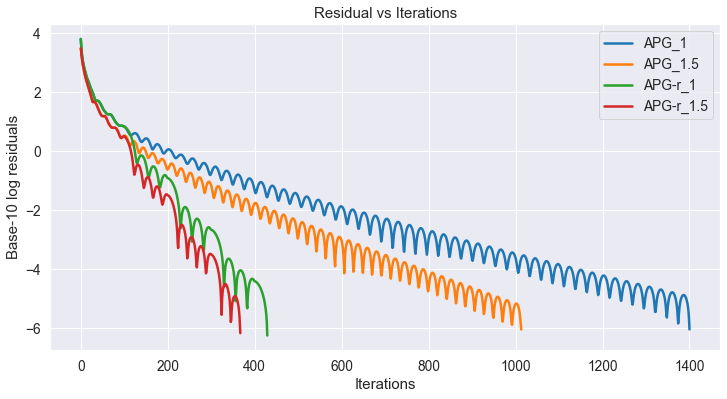

In [417]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.plot(APG_df_1.index.tolist(), APG_df_1['log10 residual_APG'].tolist(), label ='APG_1')
plt.plot(APG_df_15.index.tolist(), APG_df_15['log10 residual_APG'].tolist(), label ='APG_1.5')
plt.plot(APGr_df_1.index.tolist(), APGr_df_1['log10 residual_APG-r'].tolist(), label ='APG-r_1')
plt.plot(APGr_df_15.index.tolist(), APGr_df_15['log10 residual_APG-r'].tolist(), label ='APG-r_1.5')

plt.xlabel("Iterations")
plt.ylabel("Base-10 log residuals")
plt.legend(loc='upper right')
plt.title('Residual vs Iterations')
plt.show()